In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import scipy

In [3]:
df = xr.open_dataset("./mpi_ssp126_2021_2030.nc")
df

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 72, time: 3652)
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01T12:00:00 ... 2030-12-31T12:00:00
  * lon      (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
Data variables:
    tas      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Dec 17 13:59:08 2020: cdo remapbil,50_grid_params /p/pr...
    institution:  Potsdam Institute for Climate Impact Research (PIK)
    title:        ISIMIP3b bias-adjusted climate input data
    project:      Inter-Sectoral Impact Model Intercomparison Project phase 3...
    contact:      ISIMIP cross-sectoral science team <info@isimip.org> <https...
    summary:      CMIP6 daily output data bias-adjusted and statistically dow...
    references:   Lange (2019) <https://doi.org/10.5194/gmd-12-3055-2019> and...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [3]:

df = df.to_dataframe()
df

tas
lat   lon    time                           
-87.5 -177.5 2021-01-01 12:00:00  247.402512
             2021-01-02 12:00:00  249.034912
             2021-01-03 12:00:00  250.478104
             2021-01-04 12:00:00  249.789719
             2021-01-05 12:00:00  248.857880
...                                      ...
 87.5  177.5 2030-12-27 12:00:00  269.998352
             2030-12-28 12:00:00  264.541138
             2030-12-29 12:00:00  260.728424
             2030-12-30 12:00:00  254.892960
             2030-12-31 12:00:00  248.928741

[9465984 rows x 1 columns]

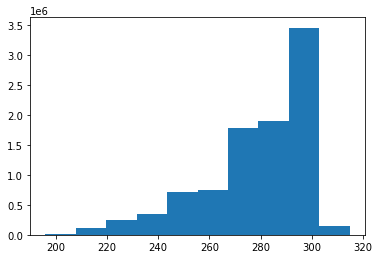

In [5]:
plt.hist(df["tas"].to_numpy())
plt.show()

In [8]:
df2 = df.reset_index().fillna(0)
df3 = df2[["lat","lon","time","tas"]].to_numpy()
df3

array([[-87.5, -177.5, Timestamp('2021-01-01 12:00:00'),
        247.4025115966797],
       [-87.5, -177.5, Timestamp('2021-01-02 12:00:00'),
        249.034912109375],
       [-87.5, -177.5, Timestamp('2021-01-03 12:00:00'),
        250.4781036376953],
       ...,
       [87.5, 177.5, Timestamp('2030-12-29 12:00:00'), 260.7284240722656],
       [87.5, 177.5, Timestamp('2030-12-30 12:00:00'),
        254.89295959472656],
       [87.5, 177.5, Timestamp('2030-12-31 12:00:00'),
        248.92874145507812]], dtype=object)

In [7]:
df4 = df3[:,2].reshape((36,72))
print(df4.shape)
plt.imshow(df4, origin="lower")
plt.colorbar()
plt.show()
df5 = np.concatenate((df4[:,-360:],df4[:,:360]), axis=1) # 0-360 lon to -180 - 180 lon
df5.shape

ValueError: cannot reshape array of size 9465984 into shape (36,72)

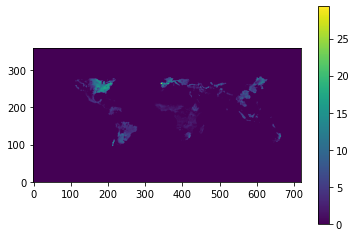

In [59]:
plt.imshow(df5, origin="lower")
plt.colorbar()

In [62]:
df6a = df5[2::2,2::2]
#df6a = np.concatenate((df6a,))
df6b = df5[1:-1:2,1:-1:2]
print(df6a.shape)
print(df6b.shape)
df7= df6a+df6b
df8 = np.zeros((181,360))
df8[1:-1,1:] = df7
df8.shape

(179, 359)
(179, 359)


(181, 360)

In [66]:
# reads the crop datasets
maize_list = []
for year in range(1981,2017):
    df = xr.open_dataset("Documents/IANNwTF/project/gdhy_v1.2_v1.3_20190128/maize/yield_{}.nc4".format(year))
    df = df.to_dataframe()
    df2 = df.reset_index().fillna(0)
    df3 = df2["var"].to_numpy()
    df4 = df3.reshape((360,720))
    df5 = np.concatenate((df4[:,-360:],df4[:,:360]), axis=1) # 0-360 lon to -180 - 180 lon
    df6a = df5[2::2,2::2]
    df6b = df5[1:-1:2,1:-1:2]
    df7= df6a+df6b
    df8 = np.zeros((181,360))
    df8[1:-1,1:] = df7
    #print(df8.shape)
    #plt.imshow(df8, origin="lower")
    #plt.show()
    maize_list.append([year,df5])

(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)


In [119]:
maize_list[0]

[1981,
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)]

In [9]:
df = xr.open_dataset("mpi_ssp126_2021_2030.nc")
df

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 72, time: 3652)
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01T12:00:00 ... 2030-12-31T12:00:00
  * lon      (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
Data variables:
    tas      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Dec 17 13:59:08 2020: cdo remapbil,50_grid_params /p/pr...
    institution:  Potsdam Institute for Climate Impact Research (PIK)
    title:        ISIMIP3b bias-adjusted climate input data
    project:      Inter-Sectoral Impact Model Intercomparison Project phase 3...
    contact:      ISIMIP cross-sectoral science team <info@isimip.org> <https...
    summary:      CMIP6 daily output data bias-adjusted and statistically dow...
    references:   Lange (2019) <https://doi.org/10.5194/gmd-12-3055-2019> and...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [10]:
df1 = df.to_dataframe()
df1

tas
lat   lon    time                           
-87.5 -177.5 2021-01-01 12:00:00  247.402512
             2021-01-02 12:00:00  249.034912
             2021-01-03 12:00:00  250.478104
             2021-01-04 12:00:00  249.789719
             2021-01-05 12:00:00  248.857880
...                                      ...
 87.5  177.5 2030-12-27 12:00:00  269.998352
             2030-12-28 12:00:00  264.541138
             2030-12-29 12:00:00  260.728424
             2030-12-30 12:00:00  254.892960
             2030-12-31 12:00:00  248.928741

[9465984 rows x 1 columns]

In [11]:
df2 = df1.reset_index()
df2

,lat,lon,time,tas
0,-87.5,-177.5,2021-01-01 12:00:00,247.402512
1,-87.5,-177.5,2021-01-02 12:00:00,249.034912
2,-87.5,-177.5,2021-01-03 12:00:00,250.478104
3,-87.5,-177.5,2021-01-04 12:00:00,249.789719
4,-87.5,-177.5,2021-01-05 12:00:00,248.857880
...,...,...,...,...
9465979,87.5,177.5,2030-12-27 12:00:00,269.998352
9465980,87.5,177.5,2030-12-28 12:00:00,264.541138
9465981,87.5,177.5,2030-12-29 12:00:00,260.728424
9465982,87.5,177.5,2030-12-30 12:00:00,254.892960


In [12]:
print(df2.dtypes)
df3 = df2.groupby([pd.Grouper(key="time", freq="M"), "lat" ,"lon"])["tas"].mean().to_frame()
df3

lat            float64
lon            float64
time    datetime64[ns]
tas            float32
dtype: object


tas
time       lat   lon               
2021-01-31 -87.5 -177.5  247.465668
                 -172.5  248.398163
                 -167.5  248.968124
                 -162.5  249.632431
                 -157.5  250.084991
...                             ...
2030-12-31  87.5  157.5  254.234268
                  162.5  254.289658
                  167.5  254.279602
                  172.5  254.289047
                  177.5  254.246124

[311040 rows x 1 columns]

In [26]:
ds = df3.to_xarray()
ds.to_netcdf("MPI-ESM1-2-HR-ssp126-month/mpi-esm1-2-hr_r1i1p1f1_w5e5_ssp126_tas_global_monthly_2021_2030.nc")
ds

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 72, time: 120)
Coordinates:
  * time     (time) datetime64[ns] 2021-01-31 2021-02-28 ... 2030-12-31
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
Data variables:
    tas      (time, lat, lon) float32 247.5 248.4 249.0 ... 254.3 254.3 254.2

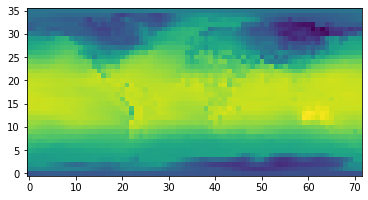

In [17]:
df4 = df3.reset_index()
df5 = df4["tas"].to_numpy()
df6 = df5[:36*72].reshape((36,72))
#df7 = np.concatenate((df6[:,-180:],df6[:,:180]), axis=1) # 0-360 lon to -180 - 180 lon
plt.imshow(df6, origin="lower")
plt.show()

In [38]:
# builds the future temperature dataset
scenarios = ["ssp370", "ssp585"]
for scenario in scenarios:
    for year in range(2021,2092,10):
        df = xr.open_dataset("MPI-ESM1-2-HR-{}/mpi-esm1-2-hr_r1i1p1f1_w5e5_{}_tas_global_daily_{}_{}.nc".format(scenario,scenario,year,year+9))
        df1 = df.to_dataframe()
        df2 = df1.reset_index()
        df3 = df2.groupby([pd.Grouper(key="time", freq="M"), "lat" ,"lon"])["tas"].mean().to_frame()
        #df4 = df3.reset_index()
        ds = df3.to_xarray()
        ds.to_netcdf("MPI-ESM1-2-HR-{}-month/mpi-esm1-2-hr_r1i1p1f1_w5e5_{}_tas_global_monthly_{}_{}.nc".format(scenario,scenario,year,year+9))

In [35]:
ds = xr.open_dataset("MPI-ESM1-2-HR-ssp126-month/mpi-esm1-2-hr_r1i1p1f1_w5e5_ssp126_tas_global_monthly_2021_2030.nc")
df = ds.to_dataframe()
df.reset_index(inplace=True)
df

,lat,lon,time,tas
0,-87.5,-177.5,2021-01-31,247.465668
1,-87.5,-177.5,2021-02-28,242.230026
2,-87.5,-177.5,2021-03-31,228.933929
3,-87.5,-177.5,2021-04-30,228.704163
4,-87.5,-177.5,2021-05-31,230.069199
...,...,...,...,...
311035,87.5,177.5,2030-08-31,272.738129
311036,87.5,177.5,2030-09-30,268.635590
311037,87.5,177.5,2030-10-31,262.299805
311038,87.5,177.5,2030-11-30,251.626877


In [39]:
# builds the rain dataset
scenarios = ["ssp370", "ssp585"]
for scenario in scenarios:
    for year in range(2021,2092,10):
        df = xr.open_dataset("MPI-ESM1-2-HR-{}/mpi-esm1-2-hr_r1i1p1f1_w5e5_{}_pr_global_daily_{}_{}.nc".format(scenario,scenario,year,year+9))
        df1 = df.to_dataframe()
        df2 = df1.reset_index()
        df3 = df2.groupby([pd.Grouper(key="time", freq="M"), "lat" ,"lon"])["pr"].mean().to_frame()
        #df4 = df3.reset_index()
        ds = df3.to_xarray()
        ds.to_netcdf("MPI-ESM1-2-HR-{}-month/mpi-esm1-2-hr_r1i1p1f1_w5e5_{}_pr_global_monthly_{}_{}.nc".format(scenario, scenario,year,year+9))

In [6]:
xr.open_dataset("Documents/IANNwTF/project/mpi-esm1-2-hr_r1i1p1f1_w5e5_ssp126_tas_global_daily_2015_2020 (1).nc")

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 72, time: 2192)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2020-12-31T12:00:00
  * lon      (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
Data variables:
    tas      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Dec 17 13:57:27 2020: cdo remapbil,50_grid_params /p/pr...
    institution:  Potsdam Institute for Climate Impact Research (PIK)
    title:        ISIMIP3b bias-adjusted climate input data
    project:      Inter-Sectoral Impact Model Intercomparison Project phase 3...
    contact:      ISIMIP cross-sectoral science team <info@isimip.org> <https...
    summary:      CMIP6 daily output data bias-adjusted and statistically dow...
    references:   Lange (2019) <https://doi.org/10.5194/gmd-12-3055-2019> and...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [68]:
ds = xr.open_dataset("Documents/IANNwTF/project/degree_points_land.nc")
df = ds.to_dataframe()
df.reset_index(inplace=True)
df

,lat,lon,land
0,-90,0,0
1,-90,1,0
2,-90,2,0
3,-90,3,0
4,-90,4,0
...,...,...,...
65155,90,355,0
65156,90,356,0
65157,90,357,0
65158,90,358,0


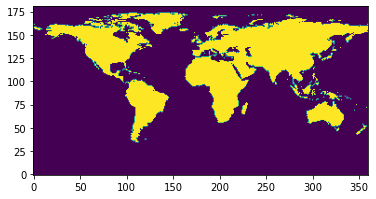

In [70]:
df1 = df["land"].to_numpy()

df1 = df1.reshape((181,360))
df1 = np.concatenate((df1[:,-180:],df1[:,:180]), axis=1) # 0-360 lon to -180 - 180 lon
plt.imshow(df1, origin="lower")
plt.show()

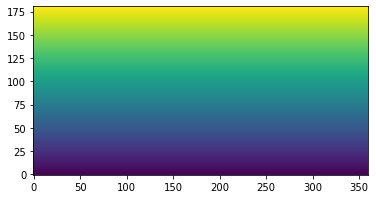

In [71]:
df1 = df["lat"].to_numpy()

df1 = df1.reshape((181,360))
df1 = np.concatenate((df1[:,-180:],df1[:,:180]), axis=1) # 0-360 lon to -180 - 180 lon
plt.imshow(df1, origin="lower")
plt.show()

In [76]:
df = xr.open_dataset("Documents/IANNwTF/project/gdhy_crops/maize/yield_1981.nc4".format(year))
df

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720)
Coordinates:
  * lon      (lon) float64 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Data variables:
    var      (lat, lon) float32 ...

In [67]:
x = [5,10,15]
y = [5,10,15]
z =  np.array([[1,2,3],
     [4,5,6],
     [7,8,9]])
print(z)
#scipy.interpolate.RectBivariateSpline(x,y,z)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


(36, 72)


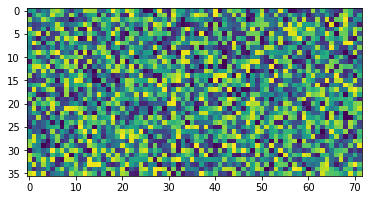

(180, 360)


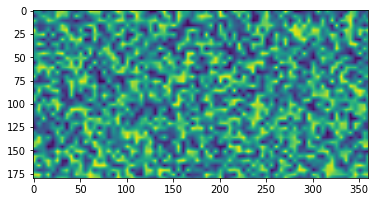

In [90]:
def unilinear_interp(x0,y0,z,multi):
    lx = z.shape[0]
    ly = z.shape[1]
    new_z = np.zeros((lx,multi*ly))
    new_y = np.zeros(multi*ly)
    for lat in range(lx):
        for lon in range(ly):
            for i in range(multi):
                factor = 1-i/multi
                new_z[lat,(y0+multi*lon+i)%(multi*ly)] = z[lat,lon]*factor+z[lat,(lon+1)%ly]*(1-factor)
    return  new_z
def bilinear_interp(x0,y0,z,multi):
    
    res = unilinear_interp(x0,y0,z,multi)
    res2 = unilinear_interp(y0,x0,np.transpose(res),multi)
    res3 = np.transpose(res2)
    return res3
z= np.random.random((36,72))
print(z.shape)
plt.imshow(z)
plt.show()
res = bilinear_interp(1,1,z,5)
print(res.shape)
plt.imshow(res)
plt.show()